# Machine Learning/SQL assignment:Team 5, (Part 1)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Paolo Musone, Kazuhiko Fukunaga, Shimon Takahashi, Jenny Cruz </strong><br>


To balance out the class imbalance in the previous classification model, we applied unsupervised machine learning models, such as Principal Component Analysis and KMeans, to figure out common purchasing behaviors among existing customers. Using the new features from PCA, we clustered labeled observations into 15 groups. 
As a result, we found the following: 
- know more about the customers better (rather than overfitting) 
- predict more precisely regarding business questions
- findings some potential business costs that need to bear

With a class of wholesaler and personal for the label, it predicted mostly wholesalers for the new observations. This is due to wholesalers account for the majority of the labeled observations. 
Flora should market promotion to "Medium Customer" and "Premium Customer". As a result of PCA clustering, we found that there are 3 clusters. This means that the behavior of these clients is divided into three groups. And it is speculated that these two groups are not individual consumers but wholesalers and retailers. Therefore, we suggest that Flora conduct a marketing campaign targeting this group.

# Introduction: (Part 1)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

Flora is a real online retailer selling mainly decoration household items. When this firm opened, they thought it would only serve individual users, but gradually a new segment of small wholesalers arose. Flora needs to know which customers are wholesalers in order to market to their needs. Therefore, based on the historical data of sales from December 2010 to December 2011, we built an algorithm to classify whether the customer data is a wholesaler or personal. By using the logistic regression method, the algorithm was 85% accurate.
Furthermore, we conclude our analysis by using Unsupervised Learning Models which eventually have reduced the data imbalance and made a better prediction. The flow is as follows.
Flow:
1. Actionable insights.
2. The basic model confusion matrix and the problems with it.
3. PCA and k-means clustering to analyze our customers.
4. Analysis summary and next steps. <br>

In [44]:
########################################
# importing packages
########################################
import numpy                 as np  # mathematical essentials
import pandas                as pd  # data science essentials
import matplotlib.pyplot     as plt # fundamental data visualization
import seaborn               as sns # enhanced visualizations

import statsmodels.formula.api as smf # linear regression (statsmodels)
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LogisticRegression # Logistic Regression model from sklearn
from sklearn.metrics import confusion_matrix, classification_report # import confusion matrix and classfication



# packages for unsupervised learning
from sklearn.preprocessing   import StandardScaler      # standard scaler
from sklearn.decomposition   import PCA                 # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering

########################################
# importing packages
########################################
import numpy                 as np  # mathematical essentials
import pandas                as pd  # data science essentials
import matplotlib.pyplot     as plt # fundamental data visualization
import seaborn               as sns # enhanced visualizations

# packages for unsupervised learning
from sklearn.preprocessing   import StandardScaler      # standard scaler
from sklearn.decomposition   import PCA                 # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier 

# Descriptive Statistics of the Data Set (Part1)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

In [2]:
########################################
# loading data and setting display options
########################################
# loading data

df = pd.read_csv("C:/Users/shimo/Documents/49_Machine Learning/assignment part 2/Team 5_data_edited2_full.csv")

# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# checking results
df.head(n = 10)

,customer_id,occupation,employment_type,education,completed_years_of_education,marital_status,relationship_in_household,race,country,total_quantity,total_spent,avg_quantity,avg_spent,var_quantity,var_spent,number_of_orders,age,type_of_client
0,442855,Other-service,Private,HS-grad,9,Divorced,Unmarried,White,United-States,144,79.20,144.0000,79.200000,0.000000,0.000000,1,24,NaN
1,587848,Unknown,Unknown,Doctorate,16,Married-civ-spouse,Husband,White,United-States,208,521.11,2.1443,5.372268,2.226592,26.592747,97,69,NaN
2,1787912,Farming-fishing,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Husband,White,United-States,55,172.89,3.6667,11.526000,8.222222,100.489197,15,66,Wholesaler
3,5740114,Craft-repair,Private,Assoc-voc,11,Married-civ-spouse,Husband,White,United-States,48,188.15,4.0000,15.679167,11.000000,184.310191,12,44,NaN
4,5957969,Other-service,Private,Bachelors,13,Married-civ-spouse,Husband,White,United-States,20,56.15,2.0000,5.615000,10.200000,97.315705,10,66,NaN
5,7362956,Farming-fishing,State-gov,Some-college,10,Married-civ-spouse,Husband,White,United-States,15,41.57,2.5000,6.928333,6.250000,67.275514,6,49,NaN
6,7675160,Prof-specialty,Local-gov,Bachelors,13,Never-married,Not-in-family,White,United-States,53,99.95,5.3000,9.995000,16.010000,65.006225,10,31,Wholesaler
7,8454297,Prof-specialty,Local-gov,Masters,14,Married-civ-spouse,Husband,White,United-States,174,512.99,3.0000,8.844655,4.586207,92.251815,58,29,NaN
8,8840517,Exec-managerial,Private,Bachelors,13,Married-civ-spouse,Husband,White,United-States,36,267.78,2.7692,20.598462,18.331361,2244.402475,13,37,NaN
9,9854163,Prof-specialty,Private,Bachelors,13,Married-civ-spouse,Wife,Asian-Pac-Islander,Philippines,2375,5067.14,5.8642,12.511457,17.608718,80.842047,405,36,Wholesaler


In [3]:
df.describe()

,customer_id,completed_years_of_education,total_quantity,total_spent,avg_quantity,avg_spent,var_quantity,var_spent,number_of_orders,age
count,4.138000e+03,4138.000000,4138.000000,4138.000000,4138.000000,4138.000000,4.138000e+03,4.138000e+03,4138.000000,4138.000000
mean,2.153243e+09,10.033833,498.224746,986.266648,-6.167590,-1.761807,7.970320e+05,3.440142e+06,82.925810,39.236829
std,1.235334e+09,2.541284,3282.663789,5413.520565,1158.038385,1203.373768,5.099073e+07,2.206064e+08,205.185483,13.936819
min,4.428550e+05,1.000000,-74215.000000,-77183.600000,-74215.000000,-77183.600000,0.000000e+00,0.000000e+00,1.000000,17.000000
25%,1.091825e+09,9.000000,52.000000,145.510000,2.368400,5.721113,3.408521e+00,3.574314e+01,16.000000,28.000000
50%,2.160319e+09,10.000000,133.000000,352.130000,3.122800,9.055481,6.294020e+00,7.663277e+01,38.000000,37.000000
75%,3.205514e+09,12.000000,343.000000,825.220000,4.125000,12.739584,1.174815e+01,1.836255e+02,92.000000,48.000000
max,4.294187e+09,16.000000,127099.000000,192277.490000,4300.000000,3096.000000,3.280095e+09,1.419100e+10,6290.000000,91.000000


In [4]:
print(df.skew(axis=0))

customer_id                      0.008971
completed_years_of_education    -0.285013
total_quantity                  16.616059
total_spent                     22.210452
avg_quantity                   -63.621631
avg_spent                      -63.801239
var_quantity                    64.327007
var_spent                       64.327019
number_of_orders                17.423178
age                              0.587158
dtype: float64


C:\Users\paomu\AppData\Local\Temp/ipykernel_9736/719304734.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.skew(axis=0))


# Data Cleansing (Part1)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Applying the Logarithmic Scale on the continuous variables </strong><br>

In [5]:
# subetting the data set for only exchisting observation in  'Type of client' 
df1=df.dropna()
df1.reset_index(drop=True, inplace=True)

In [6]:
df1

,customer_id,occupation,employment_type,education,completed_years_of_education,marital_status,relationship_in_household,race,country,total_quantity,total_spent,avg_quantity,avg_spent,var_quantity,var_spent,number_of_orders,age,type_of_client
0,1787912,Farming-fishing,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Husband,White,United-States,55,172.89,3.6667,11.526000,8.222222,100.489197,15,66,Wholesaler
1,7675160,Prof-specialty,Local-gov,Bachelors,13,Never-married,Not-in-family,White,United-States,53,99.95,5.3000,9.995000,16.010000,65.006225,10,31,Wholesaler
2,9854163,Prof-specialty,Private,Bachelors,13,Married-civ-spouse,Wife,Asian-Pac-Islander,Philippines,2375,5067.14,5.8642,12.511457,17.608718,80.842047,405,36,Wholesaler
3,34118196,Prof-specialty,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Husband,White,United-States,634,1903.68,3.0628,9.196522,6.358375,112.047390,207,38,Wholesaler
4,34233592,Prof-specialty,Self-emp-inc,Bachelors,13,Never-married,Not-in-family,White,United-States,1403,4320.27,2.9168,8.981850,3.589758,164.829720,481,31,Wholesaler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,4267530646,Adm-clerical,Private,Bachelors,13,Never-married,Own-child,Black,United-States,39,184.92,1.5000,7.112308,0.865385,207.851841,26,26,Personal
994,4273810015,Exec-managerial,Private,Bachelors,13,Divorced,Not-in-family,White,United-States,194,592.04,2.5526,7.790000,7.115651,84.084495,76,34,Personal
995,4274649364,Prof-specialty,Federal-gov,Bachelors,13,Married-civ-spouse,Husband,White,United-States,110,253.16,1.3924,3.204557,2101.782727,8012.495721,79,41,Wholesaler
996,4276118451,Adm-clerical,Private,Some-college,10,Never-married,Not-in-family,White,United-States,174,338.17,2.4507,4.762958,7.825035,71.948210,71,47,Wholesaler


In [7]:
# log transforming Birthweights and saving it to the dataset
df1['LOG_Total_Quantity'] = np.log(abs(df1['total_quantity'])+ 0.0001)


# log transforming Birthweights and saving it to the dataset
df1['LOG_Age'] = np.log(abs(df1['age'])+ 0.0001)


# log transforming Birthweights and saving it to the dataset
df1['LOG_Invoice_Lines'] = np.log(abs(df1['number_of_orders'])+ 0.0001)


# log transforming Birthweights and saving it to the dataset
df1['LOG_Total_Sales'] = np.log(abs(df1['total_spent'])+ 0.0001)

C:\Users\paomu\AppData\Local\Temp/ipykernel_9736/1592406935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['LOG_Total_Quantity'] = np.log(abs(df1['total_quantity'])+ 0.0001)
C:\Users\paomu\AppData\Local\Temp/ipykernel_9736/1592406935.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['LOG_Age'] = np.log(abs(df1['age'])+ 0.0001)
C:\Users\paomu\AppData\Local\Temp/ipykernel_9736/1592406935.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

# Dummy variables (Part1)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Converting the categorical variables in dummy variables </strong><br>


In [8]:
#convertig wholesaler
df1['Wholesaler']= 0

for index, value in df1.iterrows():
    
    if df1.loc[index, 'type_of_client'] == 'Wholesaler':
        df1.loc[index, 'Wholesaler'] = 0
    else:  
        df1.loc[index, 'Wholesaler'] = 1

#converting country
df1['From_UnitedStates']= 0

for index, value in df1.iterrows():
    if df1.loc[index, 'country'] == 'United-States':
        df1.loc[index, 'From_UnitedStates'] = 1
    else:
        df1.loc[index, 'From_UnitedStates'] = 0
        
#converting race
df1['White']= 0

for index, value in df1.iterrows():
    if df1.loc[index, 'race'] == 'White':
        df1.loc[index, 'White'] = 1
    else:
        df1.loc[index, 'White'] = 0

#converting employment type
df1['Private_Employment']= 0

for index, value in df1.iterrows():
    if df1.loc[index, 'employment_type'] == 'Private':
        df1.loc[index, 'Private_Employment'] = 1
    else:
        df1.loc[index, 'Private_Employment'] = 0

#converting education
df1['High_Education']=0

for index, value in df1.iterrows():
    if df1.loc[index, 'education'] == 'Bachelors' or df1.loc[index, 'education'] == 'Masters' or df1.loc[index, 'education'] == 'Doctorate':
        df1.loc[index, 'High_Education'] = 1
    else:
        df1.loc[index, 'High_Education'] = 0

#converting relationship_in_household
df1['With_Family']=0

for index, value in df1.iterrows():
    if df1.loc[index, 'relationship_in_household'] == 'Husband' or df1.loc[index, 'relationship_in_household'] == 'Wife' or df1.loc[index, 'relationship_in_household'] == 'Own-child':
        df1.loc[index, 'With_Family'] = 1
    else:
        df1.loc[index, 'With_Family'] = 0



#converting marital_status
df1['Married']=0

for index, value in df1.iterrows():
    if df1.loc[index, 'marital_status'] == 'Married-AF-spouse' or df1.loc[index, 'marital_status'] == 'Married-AF-spouse' or df1.loc[index, 'marital_status'] == 'Married-spouse-absent':
        df1.loc[index, 'Married'] = 1
    else:
        df1.loc[index, 'Married'] = 0


        
        
df.head(5)        

C:\Users\paomu\AppData\Local\Temp/ipykernel_9736/1899089201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Wholesaler']= 0
C:\Users\paomu\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\paomu\AppData\Local\Temp/ipykernel_9736/1899089201.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,customer_id,occupation,employment_type,education,completed_years_of_education,marital_status,relationship_in_household,race,country,total_quantity,total_spent,avg_quantity,avg_spent,var_quantity,var_spent,number_of_orders,age,type_of_client
0,442855,Other-service,Private,HS-grad,9,Divorced,Unmarried,White,United-States,144,79.20,144.0000,79.200000,0.000000,0.000000,1,24,NaN
1,587848,Unknown,Unknown,Doctorate,16,Married-civ-spouse,Husband,White,United-States,208,521.11,2.1443,5.372268,2.226592,26.592747,97,69,NaN
2,1787912,Farming-fishing,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Husband,White,United-States,55,172.89,3.6667,11.526000,8.222222,100.489197,15,66,Wholesaler
3,5740114,Craft-repair,Private,Assoc-voc,11,Married-civ-spouse,Husband,White,United-States,48,188.15,4.0000,15.679167,11.000000,184.310191,12,44,NaN
4,5957969,Other-service,Private,Bachelors,13,Married-civ-spouse,Husband,White,United-States,20,56.15,2.0000,5.615000,10.200000,97.315705,10,66,NaN


# Logistic Regression(1/2) (Part 1)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Splitting the data set in 'Train' and 'Test' to predict 'Wholesaler' </strong><br>

In [9]:
#Choosing the explenatory variable for the logistic regression model
x_variables = ['LOG_Age','LOG_Invoice_Lines',
              'From_UnitedStates','White',
              'High_Education','Married']

In [10]:
# make the variables df except for the answer columns to x ("Personal" and "Wholesaler")
x_data = df1.loc[:,x_variables]

# make the answer tables to y
y_data = df1["Wholesaler"]

# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state=219)

# merging training data for statsmodels
df1_train = pd.concat([x_train, y_train], axis = 1)

# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}

Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")




Training Data
-------------
X-side: (748, 6)
y-side: (748,)

Testing Data
------------
X-side: (250, 6)
y-side: (250,)



<AxesSubplot:>

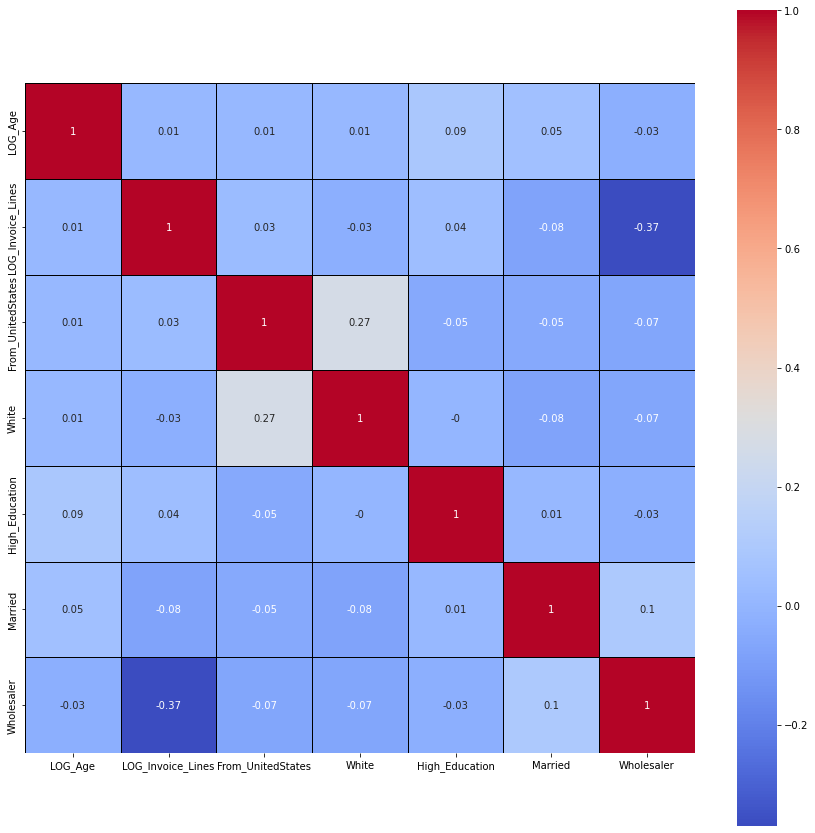

In [11]:
# instantiating a correlation matrix
df1_corr = df1_train.corr().round(2)


# setting figure size
fig, ax = plt.subplots(figsize=(15,15))


# visualizing the correlation matrix
sns.heatmap(df1_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)


# Logistic Regression(2/2) (Part 1)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Running the Logistic Regression and computing the Confusion Matrix for 'Wholesaler' </strong><br>

In [12]:

# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """Wholesaler~
LOG_Age+
LOG_Invoice_Lines+
From_UnitedStates+
White+
High_Education+
Married
""", data = df1_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.382089
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.165     
Dependent Variable: Wholesaler       AIC:              585.6054  
Date:               2022-04-07 21:10 BIC:              617.9272  
No. Observations:   748              Log-Likelihood:   -285.80   
Df Model:           6                LL-Null:          -342.33   
Df Residuals:       741              LLR p-value:      4.6638e-22
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept          2.8933   1.1396  2.5389 0.0111  0.6598  5.1268
LOG_Age           -0.2117   0.2916 -0.7258 0.4680 -0.7833  0.3599
LOG_Invoice_Lines -0.8274   0.0913 -9.0633 0.0000 -1.0063 -0.6485
From_UnitedStates -0.2854   0.3249 -0.8783 0.3798 -0.9223  0.3515
White             -0.5275   0.2952 -1.7866 0.0740 -1.1062  0.0512
High_Education    -0.1283   0.2584 -0.4963 0.6197 -0.6348  0.3783
Married            1.3140   0.9137  1.4381 0.1504 -0.4768  3.1048
=================================================================

"""

# Confusion Matrix for Training Dataset (Part 1)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Running the Confusion Matrix only for the Training dataset and showing the results </strong><br>

In [13]:
# Create the classifier: logreg
logreg =  LogisticRegression()

# Fit the classifier to the training data
logreg.fit=logreg.fit(x_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(x_train)

print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))


[[605  15]
 [101  27]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       620
           1       0.64      0.21      0.32       128

    accuracy                           0.84       748
   macro avg       0.75      0.59      0.62       748
weighted avg       0.82      0.84      0.81       748



# Confusion Matrix for Testing Dataset (Part 1)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>Running the Confusion Matrix for the Testing dataset and showing the comparison with the previous Confusion Matrix </strong><br>

In [14]:
# Create the classifier: logreg
logreg =  LogisticRegression()

# Fit the classifier to the training data
logreg.fit=logreg.fit(x_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(x_test)

# saving scoring data for future use
lg_train_score = logreg.score(x_train, y_train).round(4) # using R-square
lg_test_score = logreg.score(x_test, y_test).round(4)  # using R-square

# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = y_pred).round(decimals = 4)

# Compute and print the confusion matrix and classification report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('Logit Training Score :', logreg.score(x_train, y_train).round(4))
print('Logit Testing Score  :', logreg.score(x_test, y_test).round(4))

print('AUC Score            :', roc_auc_score(y_true  = y_test,
                                          y_score = y_pred).round(4))



# displaying and saving the gap between training and testing
print('Logit Train-Test Gap :', abs(lg_train_score - lg_test_score).round(4))
lg_test_gap = abs(lg_train_score - lg_test_score).round(4)


[[199   4]
 [ 40   7]]
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       203
           1       0.64      0.15      0.24        47

    accuracy                           0.82       250
   macro avg       0.73      0.56      0.57       250
weighted avg       0.80      0.82      0.78       250

Logit Training Score : 0.8449
Logit Testing Score  : 0.824
AUC Score            : 0.5646
Logit Train-Test Gap : 0.0209


# Comment on the Confusion Matrix  Part 1 Results

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<br> The main problem with our first Logistic regression model is that the observations of the dependent variable are unbalanced (82%/18%), which automatically makes the confusion matrix and the logistic regression model easy to predict with more than 80 % accuracy.
In addition, when analyzing the result of our prediction model, it is possible to observe that most of our testing samples came back with true positives. However, since the second most frequent testing samples returned false negatives, we can not rely on this model entirely. False-negative in an outcome makes the model mispredict the negative class. In other words, the model was not accurate in predicting the 'Personal' observations due to the imbalance of data.

Following this method may lead the marketing team and Flora company to not reach the right customers, losing many promising retail costumers. The number shows that this is the classic type two error, and according to our strategy, that's what we want to reduce to make our model more efficient and reliable.



# Unsupervised Learning, PCA Model (Part2)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>  </strong><br>

In [15]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./__analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

In [16]:
# dropping demographic information, using the numerical variables that are reflecting purchasing behavior
purchase_behavior = df.loc[: , ['number_of_orders', 
                                     'total_quantity', 'total_spent', 'avg_quantity', 'avg_spent',
                                     'var_quantity', 'var_spent']]

# applying the unsupervised_scaler function
purchases_scaled = unsupervised_scaler(df = purchase_behavior)


# checking pre- and post-scaling variance
purchases_scaled.describe(include = 'number').round(decimals = 2)

,number_of_orders,total_quantity,total_spent,avg_quantity,avg_spent,var_quantity,var_spent
count,4138.00,4138.00,4138.00,4138.00,4138.00,4138.00,4138.00
mean,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.40,-22.76,-14.44,-64.09,-64.15,-0.02,-0.02
25%,-0.33,-0.14,-0.16,0.01,0.01,-0.02,-0.02
50%,-0.22,-0.11,-0.12,0.01,0.01,-0.02,-0.02
75%,0.04,-0.05,-0.03,0.01,0.01,-0.02,-0.02
max,30.25,38.57,35.34,3.72,2.57,64.32,64.32


<AxesSubplot:>

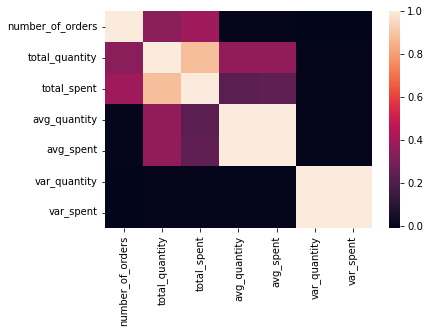

In [17]:
correlation = purchases_scaled.corr(method = 'pearson').round(decimals = 2)
sns.heatmap(correlation)

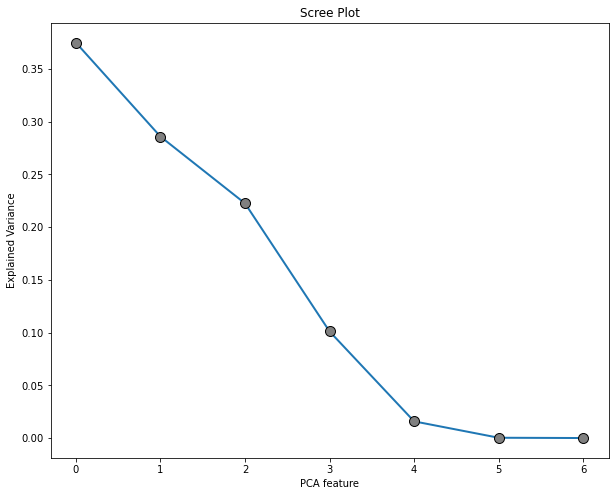

In [18]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
customer_pca = pca.fit_transform(purchases_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

PCA: 
Since there were 7 explanatory variables in the dataset, the features were converted to principal components by using PCA. As a result, the contribution rates were 37.5% for PC0, 28.9% for PC1, and 22.2% for PC2 (total about 88.6%). PC4 (contribution rate 10.1%) was not added because it exceeded the reference value of 80%, which generally explains the variance of the dataset.
MAX Components Factor Loadings:
Looking at MAX Components Factor Loadings, it is characterized by the smallest order quantity and each purchase quantity of b1. Therefore, the b1 group was named "Small customer". On the other hand, the characteristics of the b3 group are that the number of orders and the amount of each purchase are very large. We named it "Medium customer". We named it "Premium customer" because b2 has the characteristic that the number of orders and each purchase is average.
Interpretations:
First, the common point of b1 is that the number of purchases and the purchase amount are small, but it can be interpreted as a potential basis for individual consumers. This is because individual customers cannot buy large quantities of goods like wholesalers do. Or it's possible that the retailer bought it once but didn't repeat it. Next, the b2 purchasing characteristics are so average that there isn't much difference between the positive and negative scales. It is possible that wholesalers and retailers regularly purchase certain products for this cluster. Alternatively, it can be a potential basis for individual customers to make regular bulk purchases. Finally, the b3 group has in common that they buy a lot at high frequency. It is strongly inferred that the reason for their behavior is that they are wholesalers and retailers. Therefore, it is possible that they regularly buy goods from Flora for their business. It is generally unlikely that an individual consumer will buy a product in the same way as a company.

In [19]:
pca.explained_variance_ratio_[:3]

array([0.37475396, 0.2857254 , 0.2224242 ])

In [20]:
pca.components_[:3]

array([[-0.22354404, -0.51718666, -0.47175491, -0.47896732, -0.48011456,
         0.00606025,  0.00607563],
       [-0.00864886,  0.00080654, -0.00138097,  0.01123508,  0.01117746,
         0.70699075,  0.7069905 ],
       [ 0.48229523,  0.31746209,  0.42532612, -0.49357372, -0.49178257,
         0.01099219,  0.01099515]])

In [21]:
# INSTANTIATING a new model using the first three principal components
pca_3 = PCA(n_components = 3,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
customer_pca_3 = pca_3.fit_transform(purchases_scaled)

In [22]:
pca_3.components_

array([[-0.22354404, -0.51718666, -0.47175491, -0.47896732, -0.48011456,
         0.00606025,  0.00607563],
       [-0.00864886,  0.00080654, -0.00138097,  0.01123508,  0.01117746,
         0.70699075,  0.7069905 ],
       [ 0.48229523,  0.31746209,  0.42532612, -0.49357372, -0.49178257,
         0.01099219,  0.01099515]])

In [23]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(np.transpose(pca_3.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(purchases_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}""")


MAX Components Factor Loadings
------------------------------
                     0     1     2
number_of_orders -0.22 -0.01  0.48
total_quantity   -0.52  0.00  0.32
total_spent      -0.47 -0.00  0.43
avg_quantity     -0.48  0.01 -0.49
avg_spent        -0.48  0.01 -0.49
var_quantity      0.01  0.71  0.01
var_spent         0.01  0.71  0.01


In [24]:
# naming each principal component
factor_loadings.columns = ['b1',  # low quantity & low spent per purchase, shopping frequency is not high
                           'b2', # purchasing items pricing/quantity from very low/small to very high/big 
                           'b3'] # low quantity & low spent per purchase, frequent shopper, so total spent and quantity is quite high
#                           'Standard_retailer']   # high frequency, medium quantity, longevity risk 
#                           'Standard_wholesaler'] # high quantity, low price
# b = behavior 

# checking the result
factor_loadings

,b1,b2,b3
number_of_orders,-0.223544,-0.008649,0.482295
total_quantity,-0.517187,0.000807,0.317462
total_spent,-0.471755,-0.001381,0.425326
avg_quantity,-0.478967,0.011235,-0.493574
avg_spent,-0.480115,0.011177,-0.491783
var_quantity,0.006060,0.706991,0.010992
var_spent,0.006076,0.706990,0.010995


In [25]:
# analyzing factor strengths per customer
factor_loadings_df = pca_3.transform(purchases_scaled)

# converting to a DataFrame
factor_loadings_df = pd.DataFrame(factor_loadings_df)


# renaming columns
factor_loadings_df.columns = factor_loadings.columns


# checking the results
factor_loadings_df.head(n = 10)

,b1,b2,b3
0,0.129525,-0.016271,-0.395573
1,0.064461,-0.022477,-0.038338
2,0.205181,-0.018897,-0.276429
3,0.206428,-0.018734,-0.284799
4,0.229366,-0.018736,-0.297615
5,0.235052,-0.018548,-0.309397
6,0.217236,-0.018666,-0.294178
7,0.111282,-0.020799,-0.135730
8,0.198835,-0.018759,-0.278837
9,-1.013185,-0.035986,1.248016


In [26]:
# checking variance amongst clusters
np.var(factor_loadings_df)

b1    2.623278
b2    2.000078
b3    1.556969
dtype: float64

In [27]:
# applying the unsupervised_scaler function
pca_scaled = unsupervised_scaler(df = factor_loadings_df)


# checking pre- and post-scaling variance
print(np.var(factor_loadings_df), '\n\n')
print(np.var(pca_scaled))

b1    2.623278
b2    2.000078
b3    1.556969
dtype: float64 


b1    1.0
b2    1.0
b3    1.0
dtype: float64


# Unsupervised Learning, k-Means Model (Part2)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>  </strong><br>

In [28]:
# INSTANTIATING a k-Means object with three clusters
customers_k_pca = KMeans(n_clusters   = 15,
                        random_state = 219)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

9     2674
1      914
6      337
12     141
11      37
0       11
7        9
14       5
10       3
4        2
8        1
5        1
13       1
3        1
2        1
Name: Cluster, dtype: int64


In [29]:
# concatenating categorical information with pca patterns
final_df = pd.concat([df.loc[ : , ['customer_id', 'occupation', 'employment_type', 'education',
                                             'marital_status', 'relationship_in_household', 'race', 
                                             'country', 'age', 'type_of_client']],
                                            factor_loadings_df.round(decimals = 2),
                                            customers_kmeans_pca],
                                            axis = 1)


# renaming columns
final_df.columns = ['customer_id', 'occupation', 'employment_type', 'education', 'marital_status', 
                    'relationship_in_household', 'race', 'country', 'age', 'type_of_client',
                    'b1', 'b2', 'b3', 'cluster_kmeans']

# converting to a DataFrame
final_df = pd.DataFrame(final_df)

# checking the results
final_df.head(n = 10)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4138 entries, 0 to 4137
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                4138 non-null   int64  
 1   occupation                 4138 non-null   object 
 2   employment_type            4138 non-null   object 
 3   education                  4138 non-null   object 
 4   marital_status             4138 non-null   object 
 5   relationship_in_household  4138 non-null   object 
 6   race                       4138 non-null   object 
 7   country                    4138 non-null   object 
 8   age                        4138 non-null   int64  
 9   type_of_client             998 non-null    object 
 10  b1                         4138 non-null   float64
 11  b2                         4138 non-null   float64
 12  b3                         4138 non-null   float64
 13  cluster_kmeans             4138 non-null   int32

In [30]:
final_df_new = final_df.loc[ : , ['customer_id', 'type_of_client', 'b1', 'b2', 'b3', 'cluster_kmeans']]

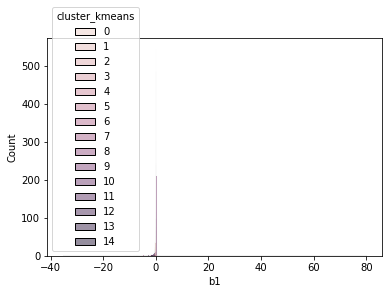

In [31]:
sns.histplot(data = final_df_new, x = 'b1', hue='cluster_kmeans')
plt.show()

In [32]:
final_df_new.info()
final_df_new['customer_id'] = final_df_new['customer_id'].astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4138 entries, 0 to 4137
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     4138 non-null   int64  
 1   type_of_client  998 non-null    object 
 2   b1              4138 non-null   float64
 3   b2              4138 non-null   float64
 4   b3              4138 non-null   float64
 5   cluster_kmeans  4138 non-null   int32  
dtypes: float64(3), int32(1), int64(1), object(1)
memory usage: 177.9+ KB


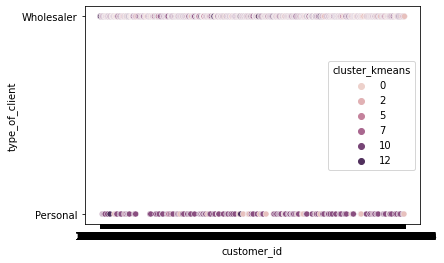

In [33]:
sns.scatterplot(data = final_df_new, y = 'type_of_client', x = 'customer_id', hue = 'cluster_kmeans')
plt.show()

In [34]:
final_df_new.loc[final_df_new['type_of_client'] == 'Wholesaler', 'cluster_kmeans'].value_counts()

9     361
1     261
6     113
12     57
11     19
0       5
4       2
7       2
14      2
5       1
Name: cluster_kmeans, dtype: int64

In [35]:
final_df_new.loc[final_df_new['type_of_client'] == 'Personal', 'cluster_kmeans'].value_counts()

9     138
1      27
6       6
12      3
2       1
Name: cluster_kmeans, dtype: int64

In [36]:
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca).round(decimals = 2)


# renaming principal components
centroids_pca_df.columns = ['just_low_needs',
                           'wide_range_needs',
                           'frequent_buyer_slim_order']


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,just_low_needs,wide_range_needs,frequent_buyer_slim_order
0,-2.07,-0.03,2.58
1,-0.00,-0.02,0.01
2,0.63,64.31,0.88
3,49.50,-1.03,39.76
4,-14.33,-0.04,14.79
5,-4.79,-0.14,9.60
6,-0.19,-0.02,0.32
7,-3.69,-0.03,3.95
8,-21.88,-0.07,22.85
9,0.11,-0.01,-0.20


In [ ]:
# clusters 2 represent personal
# clusters 0, 4, 5, 7, 11, 14 represet wholesaler
# cluster 12 represents wholesaler, with accuracy of 95%
# cluster 6 represents wholesaler, with accuracy of 94.9%
# cluster 1 represents wholesaler, with accuracy of 90.6%
# cluster 9 has ambiguous representation
# wholesaler clusters are the combination of frequent buyer with slim orders and quite high needs. So we assume the clusters 
# 8, 10 and 13 in new observations belong to wholesaler
# 

In [37]:
# renaming cluster names
cluster_name = {2: 'Personal',
               12: 'Highly_Wholesaler',
                0: 'Wholesaler',
                4: 'Wholesaler',
                5: 'Wholesaler',
                7: 'Wholesaler',
               11: 'Wholesaler',
               14: 'Wholesaler',
                1: 'Highly_Wholesaler',
                6: 'Highly_Wholesaler',
                9: 'Ambiguous',
                3: 'Unique',
                8: 'Highly_Wholesaler',
                10: 'Highly_Wholesaler',
                13: 'Highly_Wholesaler'}

final_df['cluster_kmeans'].replace(cluster_name, inplace = True)



# change column names
final_df.columns = ['customer_id', 'occupation', 'employment_type', 'education', 
                    'marital_status', 'relationship_in_household', 'race', 'country', 
                    'age', 'type_of_client', 'just_low_needs', 'wide_range_needs', 
                    'frequent_buyer_slim_order', 'new_class']

# checking results
final_df.head(n = 10)

,customer_id,occupation,employment_type,education,marital_status,relationship_in_household,race,country,age,type_of_client,just_low_needs,wide_range_needs,frequent_buyer_slim_order,new_class
0,442855,Other-service,Private,HS-grad,Divorced,Unmarried,White,United-States,24,NaN,0.13,-0.02,-0.40,Ambiguous
1,587848,Unknown,Unknown,Doctorate,Married-civ-spouse,Husband,White,United-States,69,NaN,0.06,-0.02,-0.04,Highly_Wholesaler
2,1787912,Farming-fishing,Self-emp-not-inc,HS-grad,Married-civ-spouse,Husband,White,United-States,66,Wholesaler,0.21,-0.02,-0.28,Ambiguous
3,5740114,Craft-repair,Private,Assoc-voc,Married-civ-spouse,Husband,White,United-States,44,NaN,0.21,-0.02,-0.28,Ambiguous
4,5957969,Other-service,Private,Bachelors,Married-civ-spouse,Husband,White,United-States,66,NaN,0.23,-0.02,-0.30,Ambiguous
5,7362956,Farming-fishing,State-gov,Some-college,Married-civ-spouse,Husband,White,United-States,49,NaN,0.24,-0.02,-0.31,Ambiguous
6,7675160,Prof-specialty,Local-gov,Bachelors,Never-married,Not-in-family,White,United-States,31,Wholesaler,0.22,-0.02,-0.29,Ambiguous
7,8454297,Prof-specialty,Local-gov,Masters,Married-civ-spouse,Husband,White,United-States,29,NaN,0.11,-0.02,-0.14,Ambiguous
8,8840517,Exec-managerial,Private,Bachelors,Married-civ-spouse,Husband,White,United-States,37,NaN,0.20,-0.02,-0.28,Ambiguous
9,9854163,Prof-specialty,Private,Bachelors,Married-civ-spouse,Wife,Asian-Pac-Islander,Philippines,36,Wholesaler,-1.01,-0.04,1.25,Highly_Wholesaler


In [38]:
final_df.loc[~final_df['type_of_client'].isnull(), 'new_class'].value_counts()

Ambiguous            499
Highly_Wholesaler    467
Wholesaler            31
Personal               1
Name: new_class, dtype: int64

In [49]:
final_df['new_class'].value_counts()

Ambiguous            2674
Highly_Wholesaler    1397
Wholesaler             65
Unique                  1
Personal                1
Name: new_class, dtype: int64

# Summary

To sum up, we have improved the model since there was an imbalance in the previous model that we had and knowing customers deeper by using unsupervised learning. Another thing is to change the threshold to improve the imbalance it. Our recommendations are to have more classes to have more groups as there were too many wholesalers. Moreover, to apply the algorithm with other variables such as demographics, psychometrics rather than only for purchase behavior. As a result, it can understand the entire picture to optimize the cost as well as improve the potential revenue. 